In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/student-stress-and-stress/student_stress_addiction_v3.csv')

In [3]:
# Display the first few rows of the dataset to verify it's loaded correctly
print(df.head())

   Unnamed: 0      Timestamp   Age  Gender Is_Student  \
0         0.0  1/1/2025 0:00  24.0  Female        Yes   
1         1.0  1/1/2025 0:01  21.0  Female        Yes   
2         2.0  1/1/2025 0:02  28.0    Male        Yes   
3         4.0  1/1/2025 0:04  22.0  Female        Yes   
4         5.0  1/1/2025 0:05  24.0  Female        Yes   

   Self_Reported_Stress_Level  Overall_Stress_Level  \
0                         7.0                   3.0   
1                         4.0                   3.0   
2                         8.0                   5.0   
3                         5.0                   4.0   
4                         7.0                   5.0   

   Negative_Impact_On_Academics  Avg_Sleep_Hours_Per_Night  \
0                           3.0                        7.0   
1                           2.0                        8.0   
2                           4.0                        7.0   
3                           3.0                        7.0   
4               

In [4]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'Timestamp', 'Age', 'Gender','Is_Student','Overall_Stress_Level']  # Replace with the actual column names you want to drop
df = df.drop(columns=columns_to_drop)

In [5]:
# Find and display the number of null values in each column
null_values = df.isnull().sum()
# Display the result
print(null_values)

Self_Reported_Stress_Level       1951
Negative_Impact_On_Academics     1938
Avg_Sleep_Hours_Per_Night        1938
Anxiety_Away_From_Phone          1938
Daily_Screen_Time_Mins           1938
Self_Reported_Addiction_Scale    1938
Night_Usage_Mins                 1938
Attempts_To_Reduce_Usage         1938
Unlocks_Per_Day                  1938
Total_Notifications_Per_Day      1938
Stress_Level                     1938
Addiction_Level                  1938
dtype: int64


In [6]:
# Fill null values with the mean of each column
df = df.fillna(df.mean())

# Display the first few rows of the updated dataset
print(df.head())


   Self_Reported_Stress_Level  Negative_Impact_On_Academics  \
0                         7.0                           3.0   
1                         4.0                           2.0   
2                         8.0                           4.0   
3                         5.0                           3.0   
4                         7.0                           4.0   

   Avg_Sleep_Hours_Per_Night  Anxiety_Away_From_Phone  Daily_Screen_Time_Mins  \
0                        7.0                      1.0                   160.0   
1                        8.0                      4.0                   430.0   
2                        7.0                      3.0                   490.0   
3                        7.0                      4.0                   368.0   
4                        6.0                      3.0                   196.0   

   Self_Reported_Addiction_Scale  Night_Usage_Mins  Attempts_To_Reduce_Usage  \
0                            3.0               7.0    

In [7]:
# Find and display the number of null values in each column
null_values = df.isnull().sum()
# Display the result
print(null_values)

Self_Reported_Stress_Level       0
Negative_Impact_On_Academics     0
Avg_Sleep_Hours_Per_Night        0
Anxiety_Away_From_Phone          0
Daily_Screen_Time_Mins           0
Self_Reported_Addiction_Scale    0
Night_Usage_Mins                 0
Attempts_To_Reduce_Usage         0
Unlocks_Per_Day                  0
Total_Notifications_Per_Day      0
Stress_Level                     0
Addiction_Level                  0
dtype: int64


In [8]:
# Remove duplicate rows
df = df.drop_duplicates()

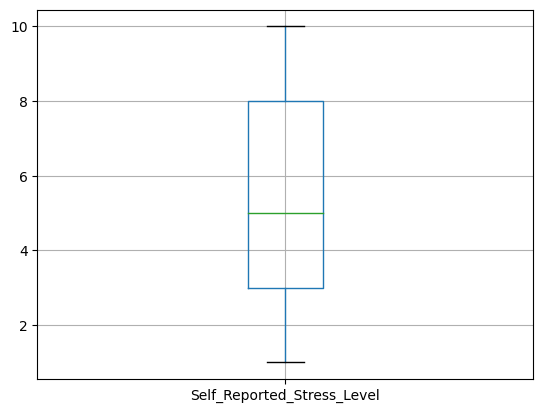

In [9]:
import matplotlib.pyplot as plt

# Plot boxplots to check for outliers in numeric columns
df[['Self_Reported_Stress_Level']].boxplot()
plt.show()

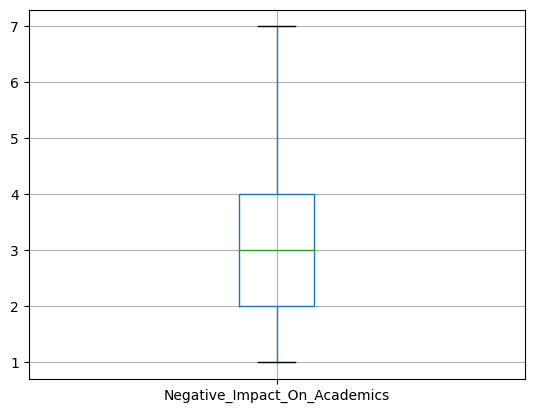

In [10]:
# Plot boxplots to check for outliers in numeric columns
df[['Negative_Impact_On_Academics']].boxplot()
plt.show()

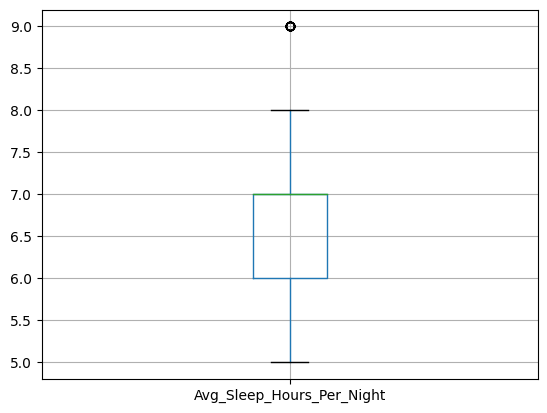

In [11]:
# Plot boxplots to check for outliers in numeric columns
df[['Avg_Sleep_Hours_Per_Night']].boxplot()
plt.show()

In [12]:
# Handle outliers using IQR method
def handle_outliers(df, columns):
    for col in columns:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
    return df

# Specify numeric columns to check for outliers
numeric_columns = ['Avg_Sleep_Hours_Per_Night']  # Replace with actual column names
df = handle_outliers(df, numeric_columns)

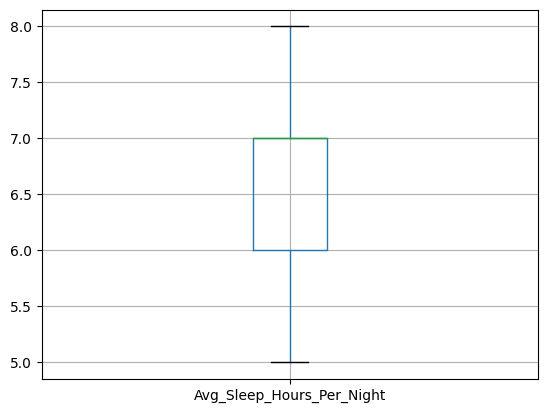

In [13]:
# Plot boxplots to check for outliers in numeric columns
df[['Avg_Sleep_Hours_Per_Night']].boxplot()
plt.show()

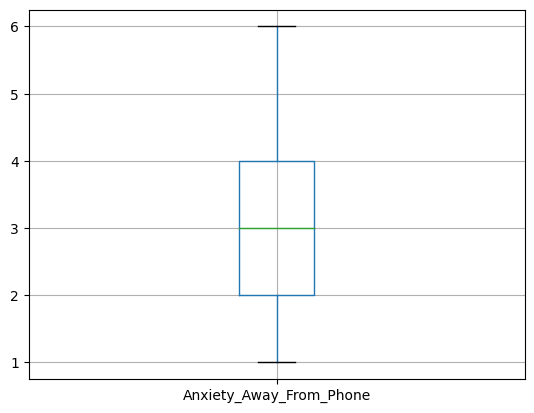

In [14]:
# Plot boxplots to check for outliers in numeric columns
df[['Anxiety_Away_From_Phone']].boxplot()
plt.show()

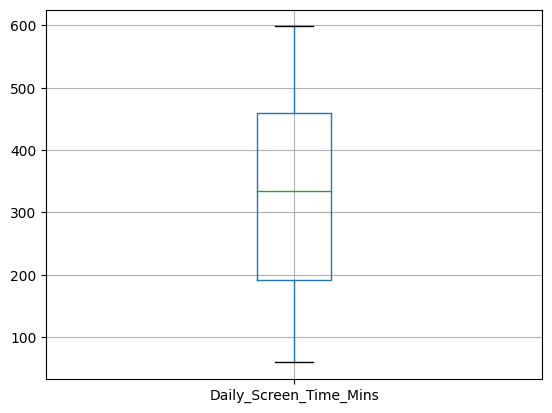

In [15]:
# Plot boxplots to check for outliers in numeric columns
df[['Daily_Screen_Time_Mins']].boxplot()
plt.show()

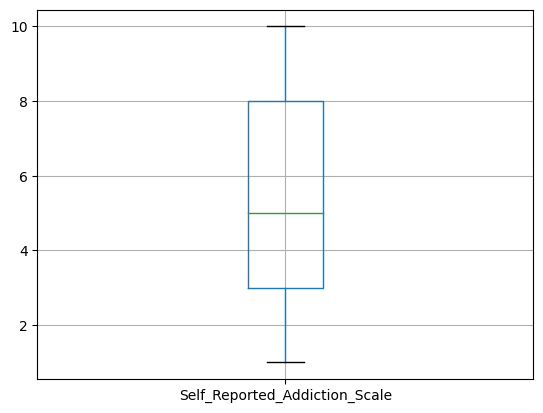

In [16]:
# Plot boxplots to check for outliers in numeric columns
df[['Self_Reported_Addiction_Scale']].boxplot()
plt.show()

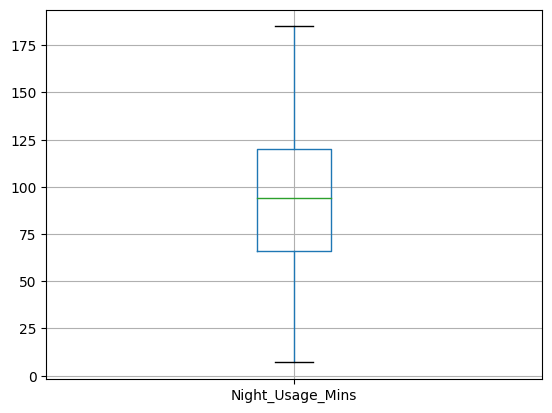

In [17]:
# Plot boxplots to check for outliers in numeric columns
df[['Night_Usage_Mins']].boxplot()
plt.show()

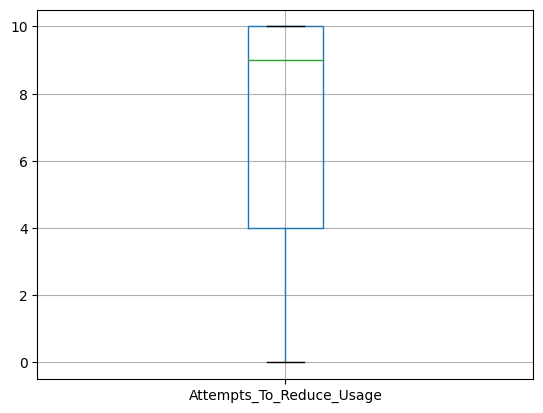

In [18]:
# Plot boxplots to check for outliers in numeric columns
df[['Attempts_To_Reduce_Usage']].boxplot()
plt.show()

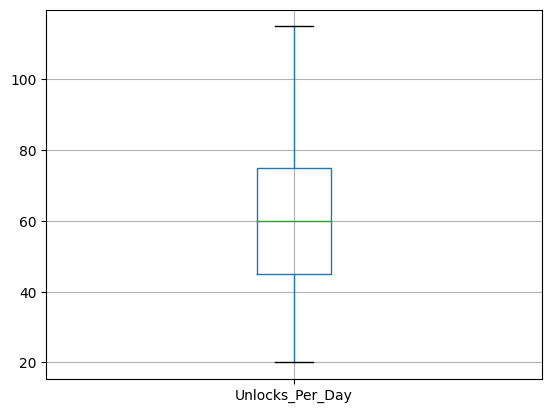

In [19]:
# Plot boxplots to check for outliers in numeric columns
df[['Unlocks_Per_Day']].boxplot()
plt.show()

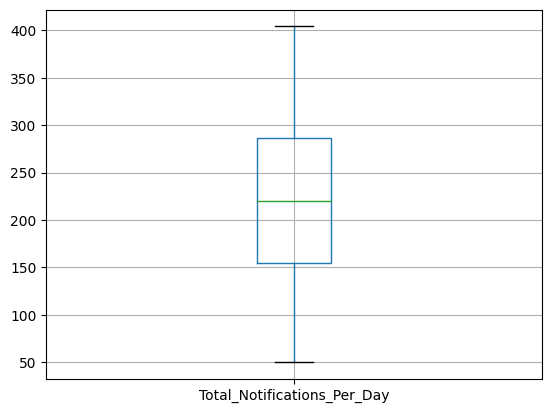

In [20]:
# Plot boxplots to check for outliers in numeric columns
df[['Total_Notifications_Per_Day']].boxplot()
plt.show()

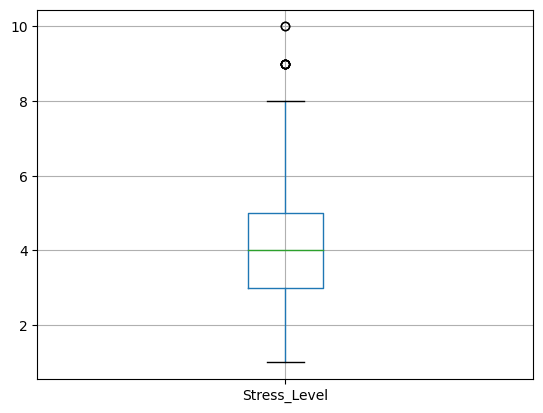

In [21]:
# Plot boxplots to check for outliers in numeric columns
df[['Stress_Level']].boxplot()
plt.show()

In [22]:
# Specify numeric columns to check for outliers
numeric_columns = ['Stress_Level']  # Replace with actual column names
df = handle_outliers(df, numeric_columns)

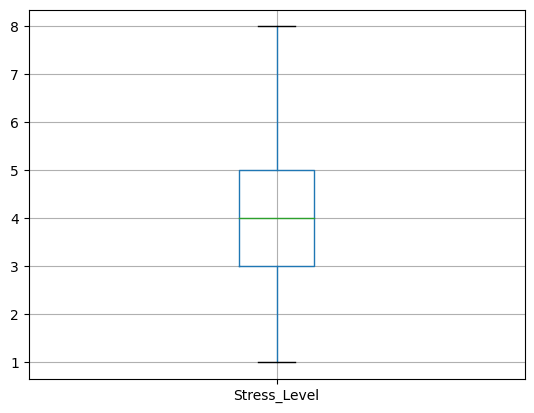

In [23]:
# Plot boxplots to check for outliers in numeric columns
df[['Stress_Level']].boxplot()
plt.show()

In [24]:
# Feature and target variables for Stress and Addiction prediction
X_stress = df[['Stress_Level', 'Negative_Impact_On_Academics',
               'Avg_Sleep_Hours_Per_Night', 'Anxiety_Away_From_Phone', 'Daily_Screen_Time_Mins']]
y_stress = df['Self_Reported_Stress_Level']

X_addiction = df[['Addiction_Level', 'Daily_Screen_Time_Mins', 'Night_Usage_Mins',
                  'Attempts_To_Reduce_Usage', 'Unlocks_Per_Day', 'Total_Notifications_Per_Day']]
y_addiction = df['Self_Reported_Addiction_Scale']

In [25]:
# Split the data into training and testing sets (80-20 split)
X_stress_train, X_stress_test, y_stress_train, y_stress_test = train_test_split(X_stress, y_stress, test_size=0.2, random_state=42)
X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test = train_test_split(X_addiction, y_addiction, test_size=0.2, random_state=42)

In [26]:
# Standardize the features (scaling)
scaler_stress = StandardScaler()
X_stress_train = scaler_stress.fit_transform(X_stress_train)
X_stress_test = scaler_stress.transform(X_stress_test)

scaler_addiction = StandardScaler()
X_addiction_train = scaler_addiction.fit_transform(X_addiction_train)
X_addiction_test = scaler_addiction.transform(X_addiction_test)

In [27]:
# Function to evaluate the models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, target):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{target} Prediction - {model_name}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    return mse, r2

In [28]:
# ----------------------------- Linear Regression Model -----------------------------
print("----- Linear Regression Model -----")
lr_model = LinearRegression()

# Cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr_model, X_stress_train, y_stress_train, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression CV Scores: {cv_scores_lr}")

# Evaluate the model for Stress and Addiction
mse_stress_lr, r2_stress_lr = evaluate_model(lr_model, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "Linear Regression", "Stress")
mse_addiction_lr, r2_addiction_lr = evaluate_model(lr_model, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "Linear Regression", "Addiction")


----- Linear Regression Model -----
Linear Regression CV Scores: [-2.17054999 -1.49751411 -1.76294018 -1.81851351 -1.8589516 ]
Stress Prediction - Linear Regression
MSE: 1.7337680366964365
R2 Score: 0.7799467090863331
Addiction Prediction - Linear Regression
MSE: 0.3772244987820565
R2 Score: 0.9537645665210701


In [29]:
# ----------------------------- Decision Tree Model -----------------------------
print("----- Decision Tree Model -----")
dt_model = DecisionTreeRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_dt = {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_stress_train, y_stress_train)

# Best parameters for Decision Tree
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

# Evaluate the model for Stress and Addiction
mse_stress_dt, r2_stress_dt = evaluate_model(grid_search_dt.best_estimator_, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "Decision Tree", "Stress")
mse_addiction_dt, r2_addiction_dt = evaluate_model(grid_search_dt.best_estimator_, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "Decision Tree", "Addiction")

----- Decision Tree Model -----
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 5}
Stress Prediction - Decision Tree
MSE: 1.7065519266466753
R2 Score: 0.7834010319574192
Addiction Prediction - Decision Tree
MSE: 1.5614201699778478
R2 Score: 0.8086207586337596


In [30]:
# ----------------------------- Random Forest Model -----------------------------
print("----- Random Forest Model -----")
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_rf = {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_stress_train, y_stress_train)

# Best parameters for Random Forest
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

# Evaluate the model for Stress and Addiction
mse_stress_rf, r2_stress_rf = evaluate_model(grid_search_rf.best_estimator_, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "Random Forest", "Stress")
mse_addiction_rf, r2_addiction_rf = evaluate_model(grid_search_rf.best_estimator_, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "Random Forest", "Addiction")

----- Random Forest Model -----
Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 500}
Stress Prediction - Random Forest
MSE: 1.6459585621209833
R2 Score: 0.7910916624161607
Addiction Prediction - Random Forest
MSE: 1.1411993110633127
R2 Score: 0.860126145032396


In [31]:
# ----------------------------- Gradient Boosting Model -----------------------------
print("----- Gradient Boosting Model -----")
gb_model = GradientBoostingRegressor(random_state=42)

# Evaluate the Gradient Boosting model for Stress and Addiction
mse_stress_gb, r2_stress_gb = evaluate_model(gb_model, X_stress_train, X_stress_test, y_stress_train, y_stress_test, "Gradient Boosting", "Stress")
mse_addiction_gb, r2_addiction_gb = evaluate_model(gb_model, X_addiction_train, X_addiction_test, y_addiction_train, y_addiction_test, "Gradient Boosting", "Addiction")

----- Gradient Boosting Model -----
Stress Prediction - Gradient Boosting
MSE: 1.7393460166885524
R2 Score: 0.779238740760735
Addiction Prediction - Gradient Boosting
MSE: 0.7313815188199898
R2 Score: 0.9103564543917451


In [32]:
# Save results to a DataFrame for comparison
results = [
    {"Model": "Linear Regression", "Stress MSE": mse_stress_lr, "Stress R2": r2_stress_lr, "Addiction MSE": mse_addiction_lr, "Addiction R2": r2_addiction_lr},
    {"Model": "Decision Tree", "Stress MSE": mse_stress_dt, "Stress R2": r2_stress_dt, "Addiction MSE": mse_addiction_dt, "Addiction R2": r2_addiction_dt},
    {"Model": "Random Forest", "Stress MSE": mse_stress_rf, "Stress R2": r2_stress_rf, "Addiction MSE": mse_addiction_rf, "Addiction R2": r2_addiction_rf},
    {"Model": "Gradient Boosting", "Stress MSE": mse_stress_gb, "Stress R2": r2_stress_gb, "Addiction MSE": mse_addiction_gb, "Addiction R2": r2_addiction_gb}
]
# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("\n----- Model Comparison Results -----")
print(results_df)


----- Model Comparison Results -----
               Model  Stress MSE  Stress R2  Addiction MSE  Addiction R2
0  Linear Regression    1.733768   0.779947       0.377224      0.953765
1      Decision Tree    1.706552   0.783401       1.561420      0.808621
2      Random Forest    1.645959   0.791092       1.141199      0.860126
3  Gradient Boosting    1.739346   0.779239       0.731382      0.910356


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


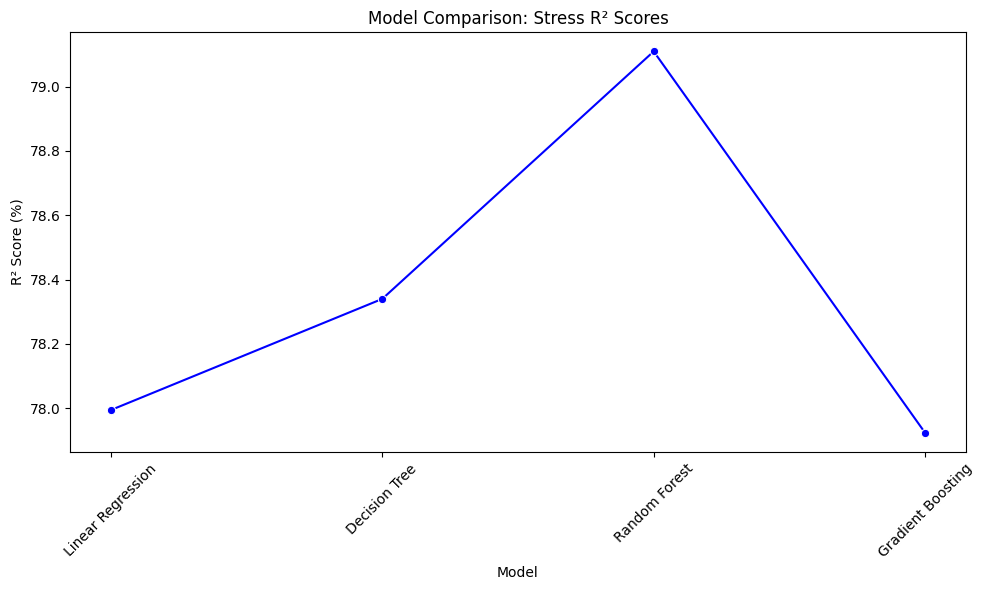

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


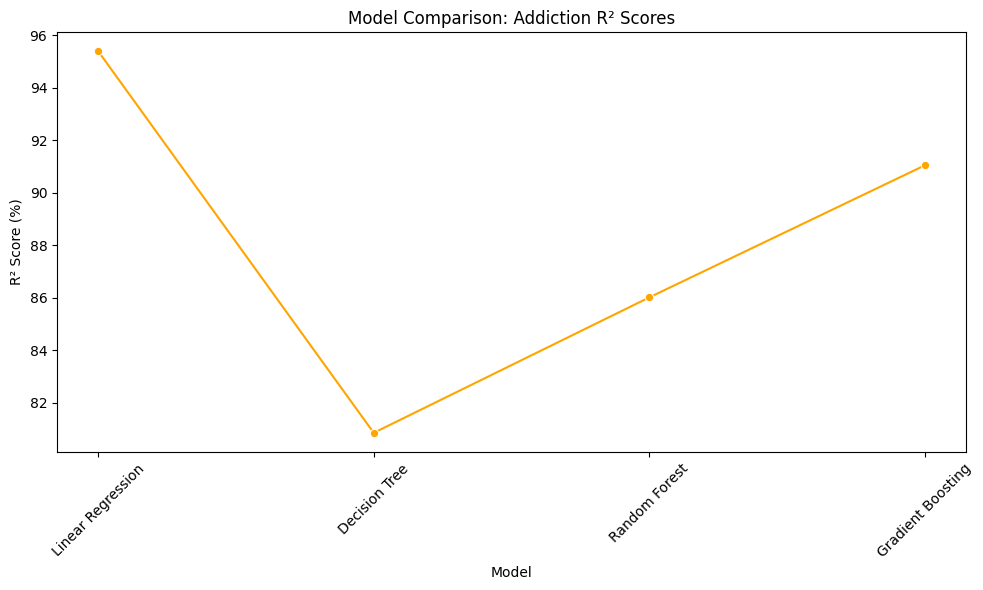

In [33]:
# Convert R² scores to percentages
results_df['Stress R2 (%)'] = results_df['Stress R2'] * 100
results_df['Addiction R2 (%)'] = results_df['Addiction R2'] * 100

# ----------------------------- Plot for Stress R² -----------------------------
plt.figure(figsize=(10, 6))

# Plot Stress R² as a line plot
sns.lineplot(x='Model', y='Stress R2 (%)', data=results_df, marker='o', color='blue')

# Customize the plot for Stress
plt.title('Model Comparison: Stress R² Scores')
plt.ylabel('R² Score (%)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the Stress plot
plt.show()

# ----------------------------- Plot for Addiction R² -----------------------------
plt.figure(figsize=(10, 6))

# Plot Addiction R² as a line plot
sns.lineplot(x='Model', y='Addiction R2 (%)', data=results_df, marker='o', color='orange')

# Customize the plot for Addiction
plt.title('Model Comparison: Addiction R² Scores')
plt.ylabel('R² Score (%)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the Addiction plot
plt.show()
